<a href="https://colab.research.google.com/github/rongxie2023/dlcv/blob/main/Chapter02/03-Building_a_neural_network_using_PyTorch_on_a_toy_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
from torch.optim import SGD
import matplotlib.pyplot as plt
# %matplotlib inline

torch.random.manual_seed(10) #固定实验结果

In [2]:
# y=a+bx

x = [[1,2],[3,4],[5,6],[7,8]]
y = [[3],[7],[11],[15]]
X = torch.tensor(x).float()
Y = torch.tensor(y).float()

In [3]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
# device="cpu"
X = X.to(device)
Y = Y.to(device)

In [4]:
#使用继承的方法创建神经网络

In [22]:
class MyNeuralNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.input_to_hidden_layer = nn.Linear(2,8)
        self.hidden_layer_activation = nn.ReLU()
        self.hidden_to_output_layer = nn.Linear(8,1)
    def forward(self, x):
        x = self.input_to_hidden_layer(x)
        x = self.hidden_layer_activation(x)
        x = self.hidden_to_output_layer(x)
        return x

In [33]:
# 自定损失函数
def my_mean_squared_error(y_hat, y):
    loss = (y_hat-y)**2
    loss = loss.mean()
    return loss

In [24]:
mynet = MyNeuralNet().to(device)

In [25]:
loss_func = nn.MSELoss()
# loss_func = my_mean_squared_error

In [26]:
# 获得网络的输出
_Y = mynet(X)
loss_value = loss_func(_Y,Y)
print(loss_value)

tensor(96.4565, device='cuda:0', grad_fn=<MeanBackward0>)


In [27]:

opt = SGD(mynet.parameters(), lr = 0.001)

In [28]:
loss_history = []
for _ in range(100):
    opt.zero_grad()
    loss_value = loss_func(mynet(X),Y)
    loss_value.backward()  #计算梯度
    opt.step()  #更新梯度
    loss_history.append(loss_value.item())

Text(0, 0.5, 'loss value')

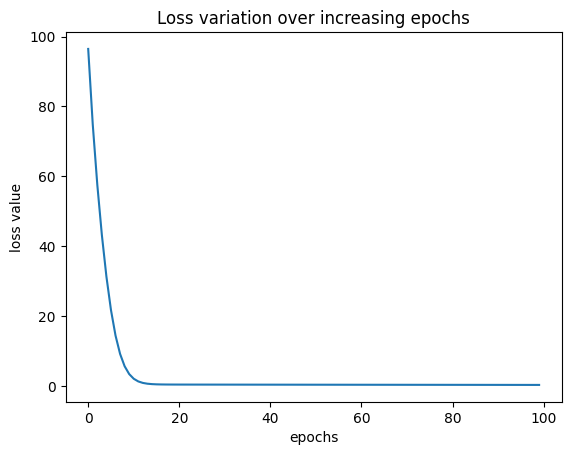

In [29]:
plt.plot(loss_history)
plt.title('Loss variation over increasing epochs')
plt.xlabel('epochs')
plt.ylabel('loss value')

In [30]:
# 测试结果
y_hat=mynet(torch.tensor([[3,4],[10,11],[2,8]],device=device).float())
print(y_hat)


tensor([[ 7.4972],
        [19.7882],
        [13.1556]], device='cuda:0', grad_fn=<AddmmBackward0>)


### 输出网络参数

In [31]:
for w in mynet.parameters():
    print(w)

Parameter containing:
tensor([[ 0.3109,  0.3788],
        [-0.1868,  0.8511],
        [ 0.2794,  0.9505],
        [ 0.1761,  0.4980],
        [ 0.4007, -0.3382],
        [-0.2057,  0.1064],
        [ 0.0674,  0.2128],
        [ 0.3587, -0.5525]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([-0.0364, -0.5447,  0.6951, -0.5121,  0.1081, -0.1932,  0.4067,  0.0024],
       device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[ 0.3128,  0.5040,  0.8599,  0.1404, -0.2033,  0.0295,  0.2302,  0.0807]],
       device='cuda:0', requires_grad=True)
Parameter containing:
tensor([0.3780], device='cuda:0', requires_grad=True)


In [32]:
print(mynet.input_to_hidden_layer.weight)
print(mynet.input_to_hidden_layer.bias)

Parameter containing:
tensor([[ 0.3109,  0.3788],
        [-0.1868,  0.8511],
        [ 0.2794,  0.9505],
        [ 0.1761,  0.4980],
        [ 0.4007, -0.3382],
        [-0.2057,  0.1064],
        [ 0.0674,  0.2128],
        [ 0.3587, -0.5525]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([-0.0364, -0.5447,  0.6951, -0.5121,  0.1081, -0.1932,  0.4067,  0.0024],
       device='cuda:0', requires_grad=True)
